In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.llamma import LLAMMA
from src.controller import Controller
from src.oracle import Oracle
from src.mpolicy import MonetaryPolicy
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from src.utils import _plot_borrowers

In [3]:
WINDOW = 600 # 10 minutes
BASE_PRICE = 1800
A = 100
FEE = 0.006
ADMIN_FEE = 1
LOAN_DISCOUNT = 0.09
LIQUIDATION_DISCOUNT = 0.06

N_BORROWERS = 100
VALUE = 60_000_000 # USD value of collateral
COINS = 60_000_000 / BASE_PRICE # Number of collateral coins
DEBT = 44_000_000 # crvUSD debt

START = int(datetime.now().timestamp())

oracle = Oracle(WINDOW)
oracle.update(START, BASE_PRICE) # set initial price
llamma = LLAMMA(A, BASE_PRICE, oracle, FEE, admin_fee=ADMIN_FEE)
mpolicy = MonetaryPolicy()
controller = Controller(llamma, mpolicy, LOAN_DISCOUNT, LIQUIDATION_DISCOUNT) 

Total collateral: 60 Mns USD
Total debt: 39 Mns USD


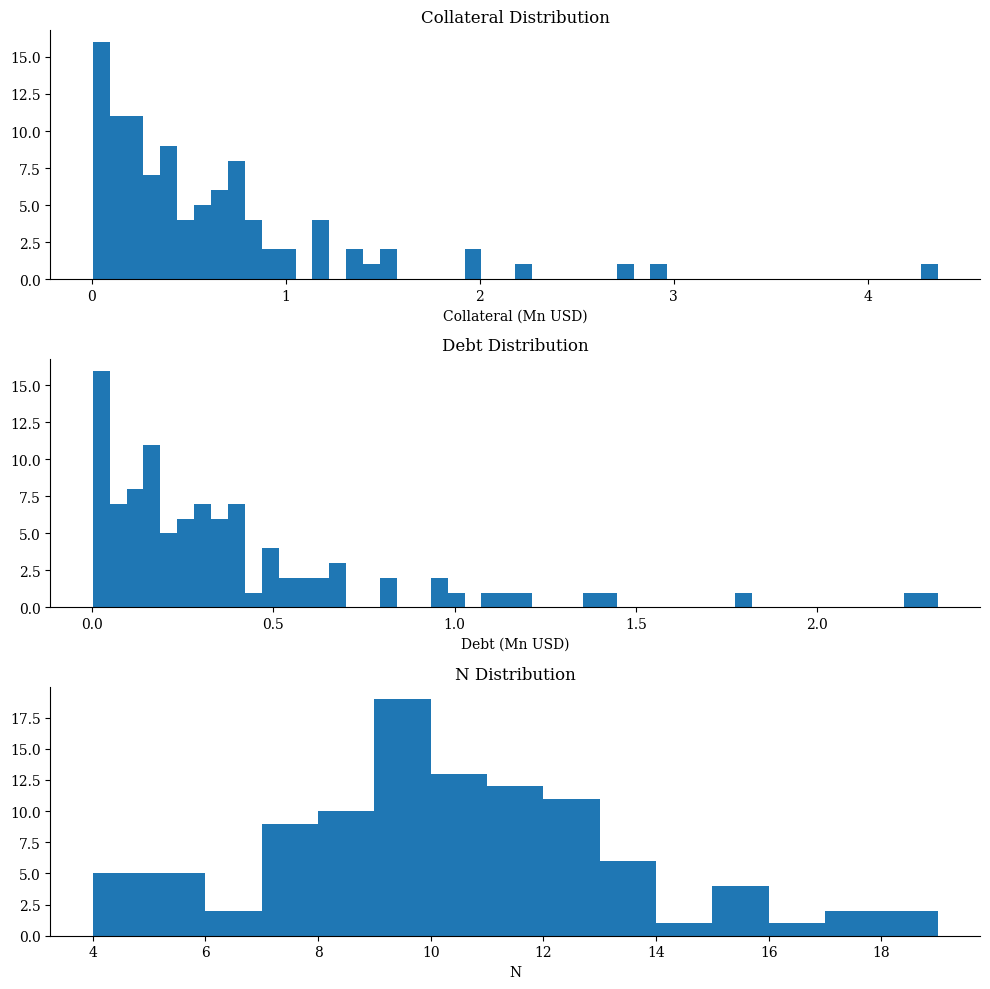

In [4]:
borrowers = controller.gen_borrowers(N_BORROWERS, COINS, v=True)
_plot_borrowers(borrowers, BASE_PRICE)

In [5]:
# Check that this generate func will generally give us ~
debts = []
for _ in range(1000):
    bs = controller.gen_borrowers(N_BORROWERS, COINS)
    debts.append(bs[:,1].sum())
print(f"Mean debt: {round(np.mean(debts) / 1e6)} Mns USD")
print(f"Desired debt: {DEBT / 1e6} Mns USD")

Mean debt: 39 Mns USD
Desired debt: 44.0 Mns USD


In [6]:
for i, b in enumerate(borrowers):
    # Deposit!
    controller.create_loan(i, *b)

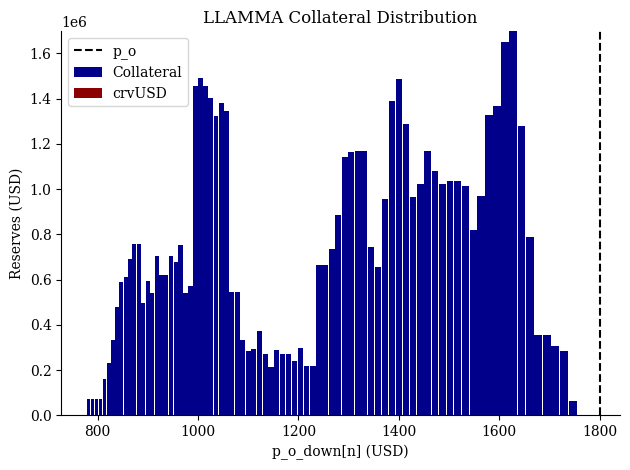

In [12]:
llamma.plot_reserves()